In [2]:
import os
import sys
import random
import math
import re
import time
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches

C:\Users\hp\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\hp\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\hp\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\hp\AppData\Roaming\Python\Python37\site-packages\ten

In [3]:
ROOT_DIR = os.path.abspath("../../")
ROOT_DIR

'C:\\Users\\hp\\Desktop\\push'

In [4]:
# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log

from samples.nails import nails

%matplotlib inline 

Using TensorFlow backend.


In [5]:
# Path to Nails trained weights

#NAILS_WEIGHTS_PATH = "mask_rcnn_nails_0005.h5"  # TODO: update this path

In [6]:
config = nails.NailsConfig()
NAILS_DIR = os.path.join(ROOT_DIR, "samples\nails\imagedataset")

In [7]:
NAILS_DIR = 'C:\\Users\\hp\\Desktop\\push\\samples\\nails\\imagedataset'

In [8]:
# Override the training configurations with a few
# changes for inferencing.
class InferenceConfig(config.__class__):
    # Run detection on one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [9]:
# Device to load the neural network on.
# Useful if you're training a model on the same 
# machine, in which case use CPU and leave the
# GPU for training.
DEVICE = "/cpu:0"  # /cpu:0 or /gpu:0

# Inspect the model in training or inference modes
# values: 'inference' or 'training'
# TODO: code for 'training' test mode not ready yet
TEST_MODE = "inference"

In [68]:
def get_ax(rows=1, cols=1, size=16):

    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

In [69]:
# Load validation dataset
dataset = nails.NailsDataset()
dataset.load_nails(NAILS_DIR, "val")

# Must call before using the dataset
dataset.prepare()

print("Images: {}\nClasses: {}".format(len(dataset.image_ids), dataset.class_names))

Images: 3
Classes: ['BG', 'nails']


In [70]:
MODEL_DIR = os.path.join(ROOT_DIR, "logs")


In [71]:
MODEL_DIR

'C:\\Users\\hp\\Desktop\\push\\logs'

In [14]:
# Create model in inference mode
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,
                              config=config)

W0903 22:31:11.651713 13428 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0903 22:31:12.004793 13428 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0903 22:31:12.182675 13428 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0903 22:31:12.595410 13428 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:1919: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.

W0903 22:31:12.632332 13428 deprecation_wrapper.py:119]

In [72]:
weights_path = model.find_last()

In [73]:
weights_path 


'C:\\Users\\hp\\Desktop\\push\\logs\\nails20190902T1605\\mask_rcnn_nails_0005.h5'

In [74]:
print("Loading weights ", weights_path)
model.load_weights(weights_path, by_name=True)

Loading weights  C:\Users\hp\Desktop\push\logs\nails20190902T1605\mask_rcnn_nails_0005.h5
Re-starting from epoch 5


In [62]:
dataset.image_ids

array([0, 1, 2])

Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  250.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  133.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int32
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
gt_class_id              shape: (4,)                  min:    1.00000  max:    1.00000  int32
gt_bbox                  shape: (4, 4)                min:  324.00000  max:  883.00000  int32
gt_mask                  shape: (1024, 1024, 4)       min:    0.00000  max:    1.00000  uint8


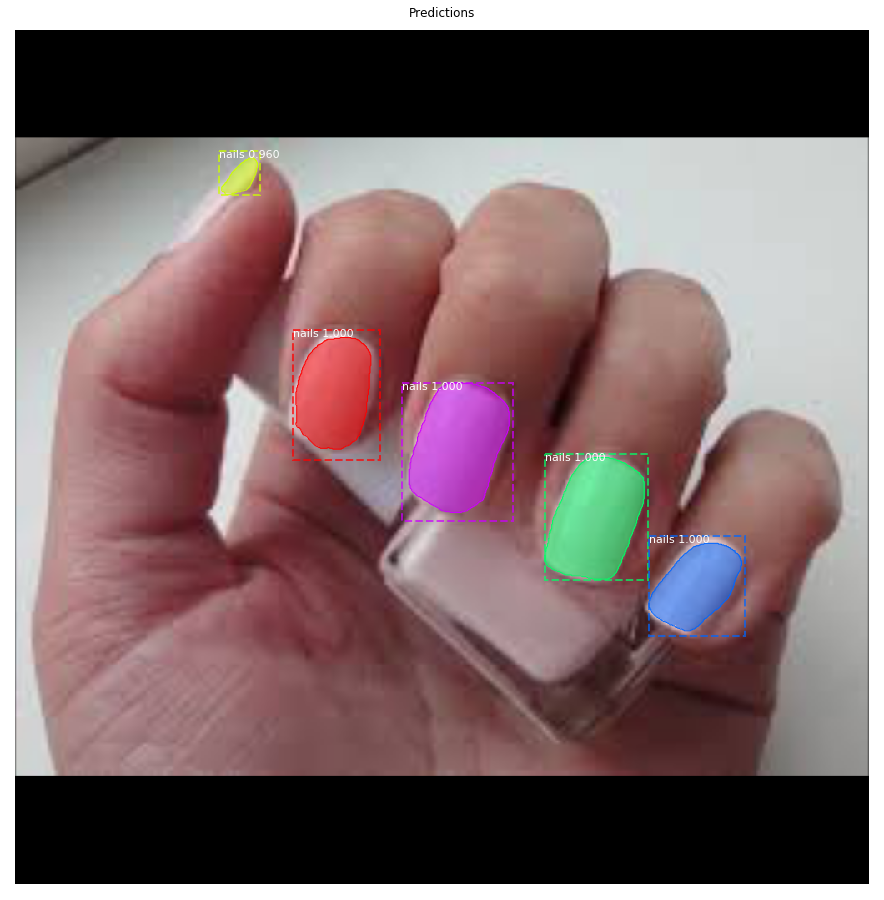

In [81]:
image_id = 1
image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)
#info = dataset.image_info[image_id]
#print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id,dataset.image_reference(image_id)))

# Run object detection
results = model.detect([image], verbose=1)

# Display results
ax = get_ax(1)
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            dataset.class_names, r['scores'], ax=ax,
                            title="Predictions")
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)



In [76]:
import skimage

In [94]:
image = skimage.io.imread('348s.jpg')

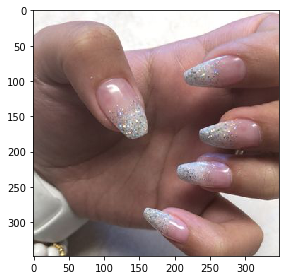

In [95]:
skimage.io.imshow(image)

In [96]:
results = model.detect([image], verbose =1)

r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            dataset.class_names, r['scores'], ax=ax,
                            title="Predictions")

Processing 1 images
image                    shape: (348, 348, 3)         min:    7.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


gt_class_id              shape: (4,)                  min:    1.00000  max:    1.00000  int32
gt_bbox                  shape: (4, 4)                min:  324.00000  max:  883.00000  int32
gt_mask                  shape: (1024, 1024, 4)       min:    0.00000  max:    1.00000  uint8


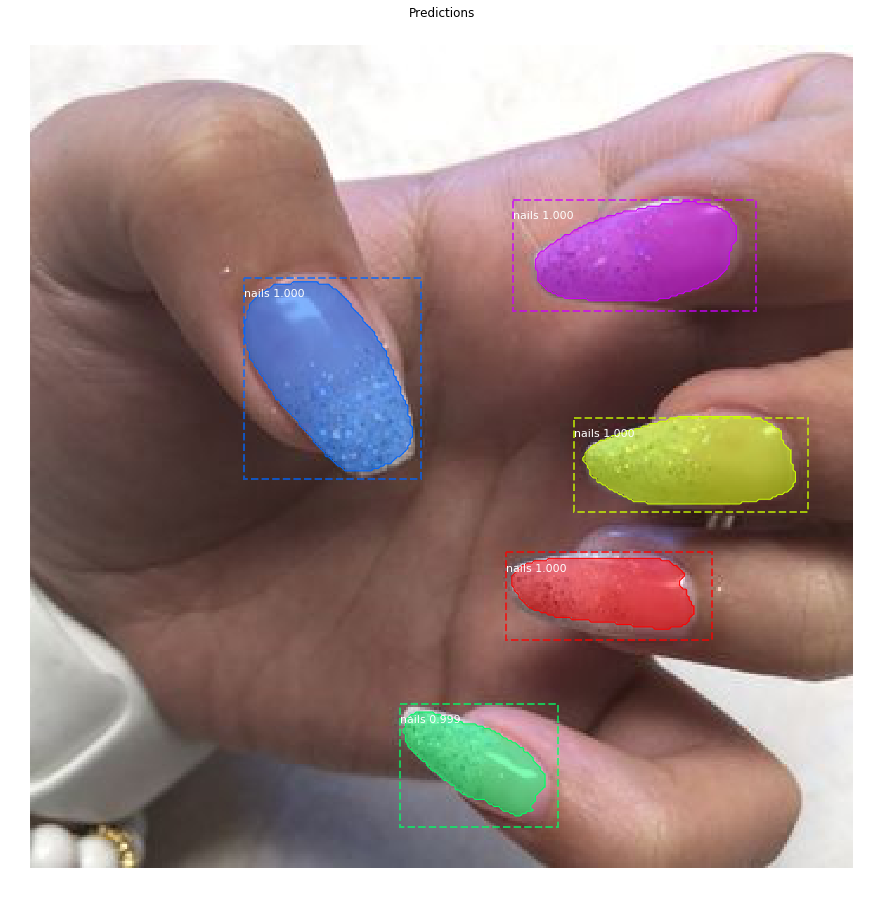

In [97]:
# Display results
ax = get_ax(1)
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            dataset.class_names, r['scores'], ax=ax,
                            title="Predictions")
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)

In [98]:
##for video incorporation

In [99]:
ls

 Volume in drive C is Windows
 Volume Serial Number is E23E-D7E3

 Directory of C:\Users\hp\Desktop\push\samples\nails

04-09-2019  21:05    <DIR>          .
04-09-2019  21:05    <DIR>          ..
01-09-2019  16:44    <DIR>          .ipynb_checkpoints
01-09-2019  17:30    <DIR>          __pycache__
04-09-2019  20:12            16,017 348s.jpg
31-08-2019  06:07    <DIR>          imagedataset
22-08-2019  16:41             4,993 images186.jpg
22-08-2019  16:41             6,196 images191.jpg
22-08-2019  16:41             4,788 images203.jpg
22-08-2019  16:41             5,296 images210.jpg
22-08-2019  16:41             5,887 images237.jpg
22-08-2019  16:41             5,418 images274.jpg
02-09-2019  02:16           159,106 my.jpg
04-09-2019  21:00           127,883 my3.jpg
01-09-2019  15:25            14,999 nails.py
04-09-2019  21:05         1,003,559 test.ipynb
04-09-2019  20:12            64,291 test1.jpg
              12 File(s)      1,418,433 bytes
               5 Dir(s)  120,380,27

In [ ]:
r